In [185]:
import os
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import json
import cv2
from sympy import symbols, solve, Eq

In [2]:
pwd

'/home/aman/Documents/Tally/DocumentAI'

In [4]:
datasetPath = "/home/aman/Documents/Tally/DocumentAI/Dataset"

In [5]:
os.listdir(datasetPath)

['train', 'test']

In [6]:
trainDatasetPath = datasetPath + "/train"

In [8]:
trainDir = os.listdir(trainDatasetPath)

In [9]:
len(trainDir)

39

In [11]:
os.chdir(trainDatasetPath)

In [22]:
trainingFolders = []
for dir in trainDir:
    trainingFolders.append(dir)

In [23]:
trainingFolders

['e2b4e0d95ff781dd',
 'e2b4e0d95ff7858f',
 'e2b4e0d95ff78b75',
 'e2b4e0d95ff78bf7',
 'e2b4e0d95ff78aeb',
 'e2b4e0d95ff78d91',
 'e2b4e0d95ff78d0b',
 'e2b4e0d95ff78619',
 'e2b4e0d95ff78d07',
 'e2b4e0d95ff78f2b',
 'e2b4e0d95ff786a3',
 'e2b4e0d95ff7836f',
 'e2b4e0d95ff789d3',
 'e2b4e0d95ff7803f',
 'e2b4e0d95ff7803b',
 'e2b4e0d95ff7814b',
 'e2b4e0d95ff78bfb',
 'e2b4e0d95ff788c3',
 'e2b4e0d95ff78ae7',
 'e2b4e0d95ff788c7',
 'e2b4e0d95ff78a5d',
 'e2b4e0d95ff78fb1',
 'e2b4e0d95ff78043',
 'e2b4e0d95ff789d7',
 'e2b4e0d95ff78fb5',
 'e2b4e0d95ff781d9',
 'e2b4e0d95ff78509',
 'e2b4e0d95ff78729',
 'e2b4e0d95ff78a61',
 'e2b4e0d95ff781d5',
 'e2b4e0d95ff780c5',
 'e2b4e0d95ff787bb',
 'e2b4e0d95ff782e5',
 'e2b4e0d95ff783fd',
 'e2b4e0d95ff7883d',
 'e2b4e0d95ff7894d',
 'e2b4e0d95ff787b3',
 'e2b4e0d95ff78d95',
 'e2b4e0d95ff78e17']

In [28]:
jsonFiles = []
for folder in trainingFolders:
    filePath = folder+"/"+os.listdir(folder)[0]
    file=open(filePath)
    jsonData=json.load(file)
    jsonFiles.append(jsonData)
    

In [31]:
sample = jsonFiles[0]

In [32]:
sample.keys()

dict_keys(['entities', 'pages', 'shardInfo', 'text', 'uri'])

In [116]:
sample["pages"][0].keys()

dict_keys(['blocks', 'detectedLanguages', 'dimension', 'image', 'layout', 'lines', 'pageNumber', 'paragraphs', 'tokens'])

In [115]:
sample["pages"][0]["layout"]

{'boundingPoly': {'normalizedVertices': [{},
   {'x': 1},
   {'x': 1, 'y': 1},
   {'y': 1}],
  'vertices': [{}, {'x': 1700}, {'x': 1700, 'y': 2200}, {'y': 2200}]},
 'orientation': 'PAGE_UP',
 'textAnchor': {'textSegments': [{'endIndex': '1142'}]}}

In [42]:
sample["entities"][0]["id"]

'962f2884ea9a549f'

In [43]:
sample["entities"][0]["mentionText"]

'S22 15'

In [107]:
sample["entities"][0]["pageAnchor"]["pageRefs"]

[{'boundingPoly': {'normalizedVertices': [{'x': 0.81764704, 'y': 0.049545456},
    {'x': 0.87529409, 'y': 0.049545456},
    {'x': 0.87529409, 'y': 0.061818182},
    {'x': 0.81764704, 'y': 0.061818182}]}}]

In [52]:
sample["entities"][0]["textAnchor"]

{'content': 'S22 15', 'textSegments': [{'endIndex': '50', 'startIndex': '44'}]}

In [53]:
sample["entities"][0]["type"]

'invoice_id'

In [67]:
for entity in sample["entities"]:
    print(entity["type"])

invoice_id
invoice_date
supplier_tax_id
receiver_name
ship_to_address
receiver_tax_id
receiver_tax_id
net_amount
net_amount
net_amount
total_tax_amount
total_amount
invoice_type
line_item
line_item
line_item
line_item
line_item
supplier_name


In [68]:
for entity in sample["entities"]:
    if entity["type"]=="invoice_date":
        invoiceDateEntity = entity
        print(entity["mentionText"])
        break

04/11/2022


In [82]:
invoiceDatePositionsDict = invoiceDateEntity["pageAnchor"]["pageRefs"][0]["boundingPoly"]["normalizedVertices"]

In [94]:
invoiceDatePositions = []
for position in invoiceDatePositionsDict:
    tup=[position["x"], position["y"]]
    invoiceDatePositions.append(tuple(tup))

In [96]:
invoiceDatePositions

[(0.81117648, 0.065454543),
 (0.87823528, 0.065454543),
 (0.87823528, 0.075000003),
 (0.81117648, 0.075000003)]

In [100]:
os.chdir("/home/aman/Documents/Tally/DocumentAI/samples/images")

In [145]:
img = cv2.imread("26.jpeg")

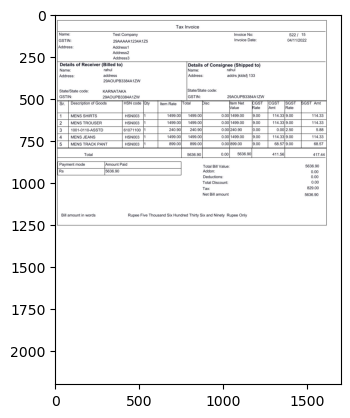

In [146]:
plt.imshow(img)

In [134]:
img.shape

(2200, 1700, 3)

In [138]:
0.075000003 * 2200

165.00000659999998

In [147]:
image = cv2.rectangle(img, (1379, 143), (1492, 165), (0, 255, 0), 3)

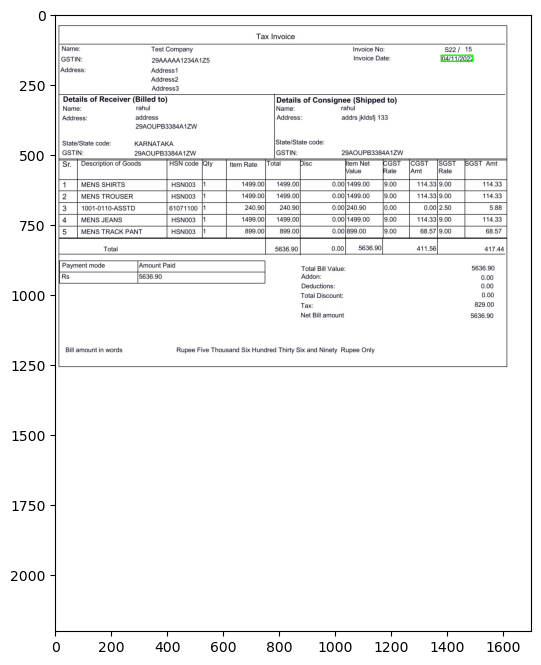

In [149]:
plt.figure(figsize=(12, 8))
plt.imshow(image)

In [167]:
def outputExtractor(trueDates,truePositions, datasetPath):
    os.chdir(datasetPath)
    jsons = []
    for dir in os.listdir():
        os.chdir(datasetPath + "/" + dir)
        file = open(os.listdir()[0])
        data = json.load(file)
        jsons.append(data)
    for j in jsons:
        for entity in j["entities"]:
            if entity["type"]=="invoice_date":
                invoiceDateEntity = entity
                trueDates.append(entity["mentionText"])
                break
        invoiceDatePositionsDict = invoiceDateEntity["pageAnchor"]["pageRefs"][0]["boundingPoly"]["normalizedVertices"]
        pos = []
        for position in invoiceDatePositionsDict:
            tup=[position["x"], position["y"]]
            pos.append(tuple(tup))
        truePositions.append(pos)
    return trueDates, truePositions        

In [168]:
trueDates, truePositions = outputExtractor([], [], trainDatasetPath)

In [175]:
print(trueDates, "\n\n\n", truePositions)

['04/11/2022', '1-Feb-23', '05Dec2022', '24-DEC-22', '10-Oct-2022', '05/12/2022', '2023-03-11', '1-Mar-23', '1-Feb-23', 'October 9, 2022', '01-Apr-2023', '20-Feb-23', '14-Mar-23', '02.04.2023', 'January 7th 2020', '2-Mar-20', '28-SEP-2022', 'Sun, 26 Mar 2023', '01-Apr-2023', '15/04/2022', '2-Mar-20', '10/04/22', '04/11/2022', '05Dec2022', '19-12-2022', '24-DEC-22', '14-Mar-23', '17-Aug-2022', '14/06/2021', '10/04/22', '04/11/2022', '7-Mar-23', '5-Dec-22', '2-Mar-20', '21-Mar-2023', 'Sun, 26 Mar 2023', '04/11/2022', '05/02/23', '27/12/2022'] 


 [[(0.81117648, 0.065454543), (0.87823528, 0.065454543), (0.87823528, 0.075000003), (0.81117648, 0.075000003)], [(0.74349666, 0.059050065), (0.81488204, 0.059050065), (0.81488204, 0.072314933), (0.74349666, 0.072314933)], [(0.21529412, 0.22772728), (0.30294117, 0.22772728), (0.30294117, 0.23999999), (0.21529412, 0.23999999)], [(0.44404113, 0.16930312), (0.5124017, 0.16930312), (0.5124017, 0.17870885), (0.44404113, 0.17870885)], [(0.75999999, 0.14

In [179]:
print(sample["text"])

Tax Invoice
Name:
Invoice No:
Invoice Date:
S22 15
04/11/2022
GSTIN:
Address:
Test Company
29AAAAA1234A1Z5
Address 1
Address2
Address3
Details of Receiver (Billed to)
Name:
rahul
Address:
address
29AOUPB3384A1ZW
Details of Consignee (Shipped to)
Name:
rahul
Address:
addrs jkldsfj 133
State/State code:
State/State code: KARNATAKA
GSTIN:
29AOUPB3384A1ZW
Description of Goods
HSN code Qty
GSTIN:
29AOUPB3384A1ZW
Sr.
Item Rate
Total
Disc
SGST Amt
Item Net
Value
CGST
Rate
CGST
Amt
SGST
Rate
1
MENS SHIRTS
HSN003
1
1499.00
1499.00
0.00 1499.00
9.00
114.33 9.00
114.33
2
MENS TROUSER
HSN003
1
1499.00
1499.00
0.00 1499.00
9.00
114.33 9.00
114.33
3
1001-0110-ASSTD
61071100 1
240.90
240.90
0.00 240.90
0.00
0.00 2.50
5.88
4
MENS JEANS
HSN003
1
1499.00
1499.00
0.00 1499.00
9.00
114.33 9.00
114.33
5
MENS TRACK PANT
HSN003
1
899.00
899.00
0.00 899.00
9.00
68.57 9.00
68.57
Total
5636.90
0.00
5636.90
411.56
417.44
Payment mode
Amount Paid
Rs
5636.90
Total Bill Value:
Addon:
Deductions:
Total Discount:
563

In [202]:
def findCentroid(points):
    topLeft = points[0]
    topRight = points[1]
    bottomRight = points[2]
    bottomLeft = points[3]
    X = (topLeft[0] + bottomRight[0])/2
    Y = (topLeft[1] + bottomRight[1])/2
    return [X, Y]

In [203]:
findCentroid([(0.81117648, 0.065454543), (0.87823528, 0.065454543), (0.87823528, 0.075000003), (0.81117648, 0.075000003)])

[0.84470588, 0.070227273]

In [207]:
outputCentroids = []
for point in truePositions:
    cent = findCentroid(point)
    outputCentroids.append(cent)

In [208]:
print(outputCentroids)

[[0.84470588, 0.070227273], [0.77918935, 0.065682499], [0.259117645, 0.23386363500000001], [0.478221415, 0.174005985], [0.8067646900000001, 0.15590909], [0.82088235, 0.166363635], [0.717927185, 0.180452675], [0.764705865, 0.092500001], [0.77918935, 0.065682499], [0.84210524, 0.058999574], [0.160919545, 0.132321505], [0.785014895, 0.23799520000000002], [0.83352941, 0.17863636500000002], [0.8778718400000001, 0.494869605], [0.85247883, 0.17122702], [0.29794118, 0.135], [0.658706155, 0.17657118], [0.21184267, 0.318621515], [0.160919545, 0.132321505], [0.75382355, 0.154090915], [0.29794118, 0.135], [0.8724304700000001, 0.19837537500000002], [0.7991176550000001, 0.07249999800000001], [0.259117645, 0.23386363500000001], [0.2509069, 0.221984605], [0.478221415, 0.174005985], [0.83352941, 0.17863636500000002], [0.77323529, 0.209794695], [0.342240275, 0.26330109], [0.8724304700000001, 0.19837537500000002], [0.082352939, 0.149318185], [0.20397112, 0.21611253], [0.656472685, 0.077763494], [0.725294

In [209]:
len(outputCentroids)

39

In [211]:
text = sample["text"]

In [214]:
import spacy
from spacy import displacy

In [216]:
nlpModel = spacy.load("en_core_web_lg")

In [217]:
document = nlpModel(text)

In [223]:
for entity in document.ents:
    print(entity.text, "->", entity.label_)

Test Company -> ORG
29AAAAA1234A1Z5 -> CARDINAL
1 -> CARDINAL
29AOUPB3384A1ZW -> CARDINAL
Consignee -> PERSON
addrs jkldsfj -> PERSON
133 -> CARDINAL
State/State -> ORG
State -> ORG
KARNATAKA -> PERSON
29AOUPB3384A1ZW -> CARDINAL
Description of Goods -> ORG
HSN -> ORG
29AOUPB3384A1ZW -> CARDINAL
1 -> CARDINAL
HSN003 -> GPE
1 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
9.00 -> CARDINAL
114.33 -> CARDINAL
114.33 -> CARDINAL
2 -> CARDINAL
HSN003 -> GPE
1 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
9.00 -> CARDINAL
114.33 -> CARDINAL
114.33 -> CARDINAL
3 -> CARDINAL
61071100 -> CARDINAL
240.90 -> CARDINAL
240.90 -> CARDINAL
0.00 -> CARDINAL
240.90 -> CARDINAL
0.00 -> CARDINAL
0.00 -> CARDINAL
2.50 -> CARDINAL
5.88 -> CARDINAL
4 -> CARDINAL
MENS JEANS -> ORG
HSN003 -> GPE
1 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
1499.00 -> CARDINAL
9.00 -> CARDINAL
114.33 -> CARDINAL
114.33 -> CARDINAL
5 -> CARDINAL
HSN003 -> GPE
1 -> CARD